In [1]:
#------------------------------------------------------------------------------------------------------------------
#   Tarea de regresion lineal
#   Alma Paulina Gonzalez Sandoval A01631256
#------------------------------------------------------------------------------------------------------------------

In [130]:
import sys
!{sys.executable} -m pip install pandas
import sys
!{sys.executable} -m pip install seaborn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict

In [126]:
file_path = 'life_expectancy_data.csv'
df = pd.read_csv(file_path)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [9]:
#Variables 
var_independientes = [ 'Adult Mortality', 'infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ', 
                      'under-five deaths ','Polio', 'Total expenditure', ' HIV/AIDS', 'GDP', 'Population',
                 ' thinness 5-9 years', 'Income composition of resources','Schooling']
var_dependiente = 'Life expectancy '

data = df[var_independientes + [var_dependiente]]

data_cleaned = data.dropna()

x = data_cleaned[var_independientes].values
y = data_cleaned[var_dependiente].values

print(data_cleaned.head())
print(f"Variables independientes (X): {x.shape}")
print(f"Variable dependiente (y): {y.shape}")
print(df.head())

   Adult Mortality  infant deaths  percentage expenditure  Hepatitis B  \
0            263.0             62               71.279624         65.0   
1            271.0             64               73.523582         62.0   
2            268.0             66               73.219243         64.0   
3            272.0             69               78.184215         67.0   
4            275.0             71                7.097109         68.0   

   Measles   under-five deaths   Polio  Total expenditure   HIV/AIDS  \
0      1154                  83    6.0               8.16        0.1   
1       492                  86   58.0               8.18        0.1   
2       430                  89   62.0               8.13        0.1   
3      2787                  93   67.0               8.52        0.1   
4      3013                  97   68.0               7.87        0.1   

          GDP  Population   thinness 5-9 years  \
0  584.259210  33736494.0                 17.3   
1  612.696514    32758

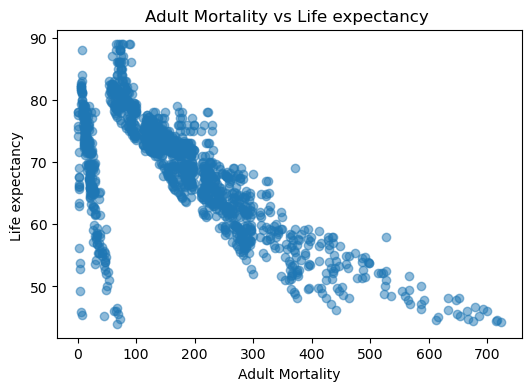

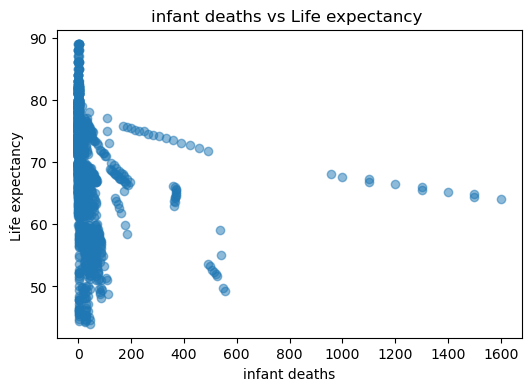

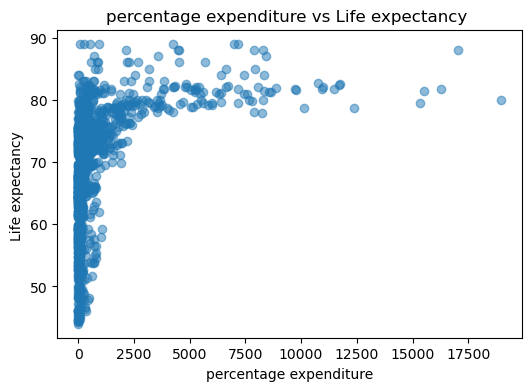

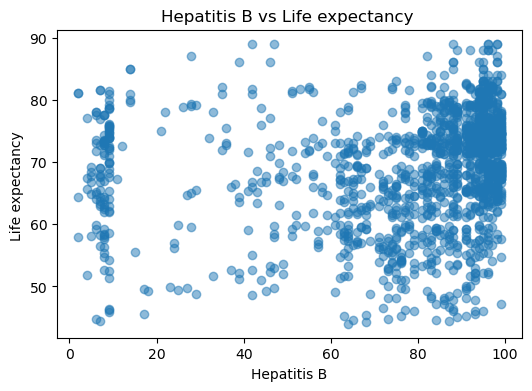

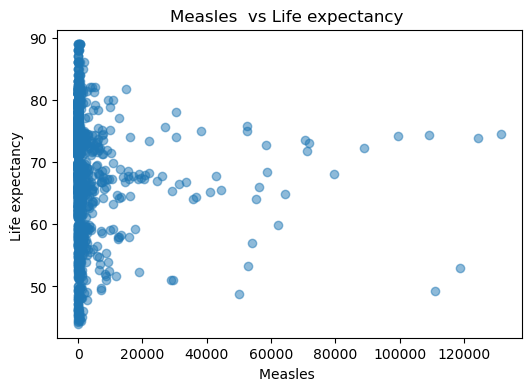

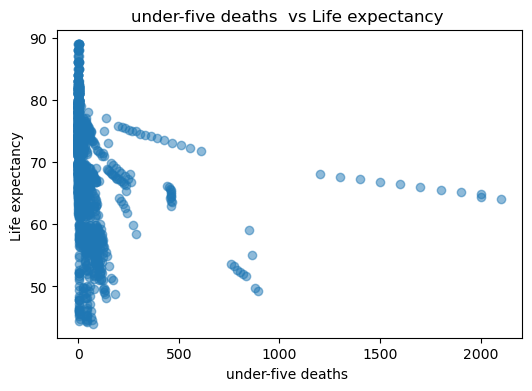

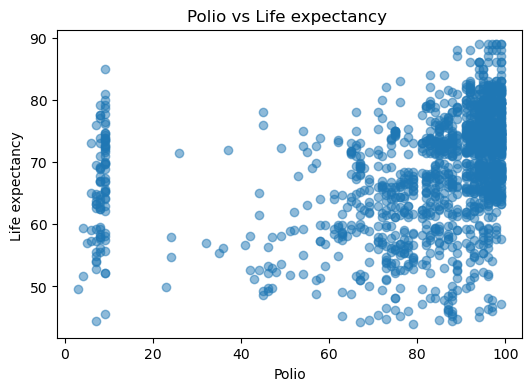

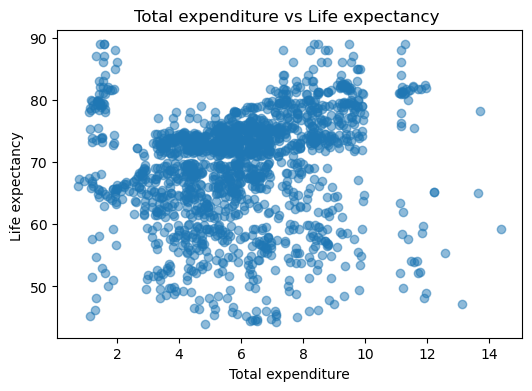

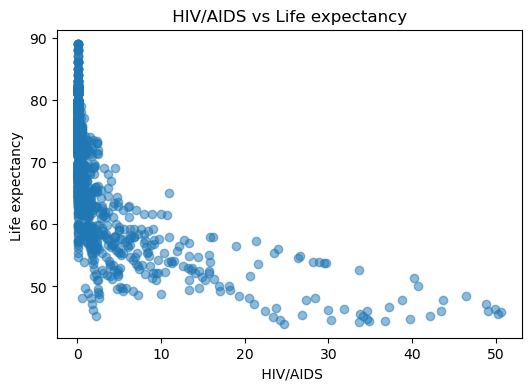

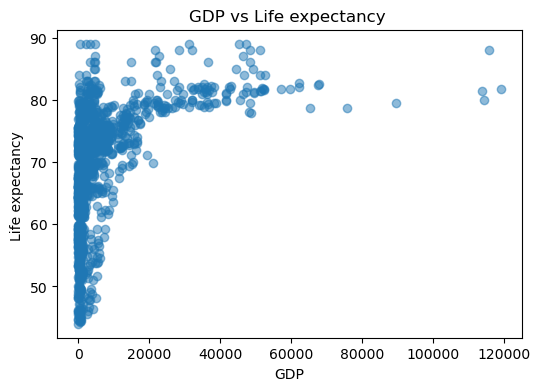

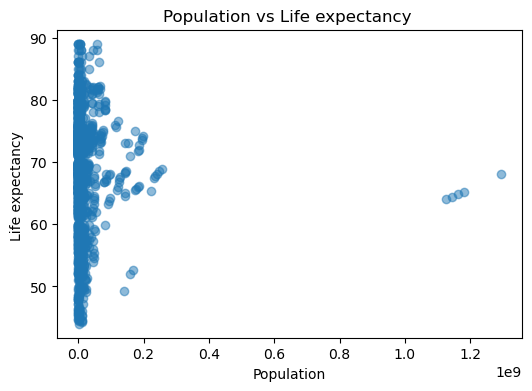

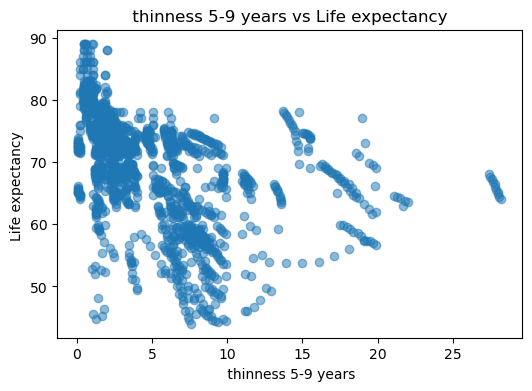

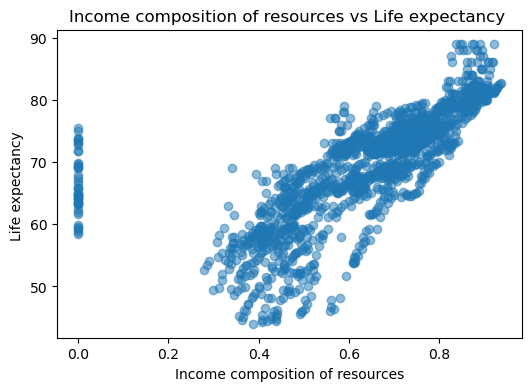

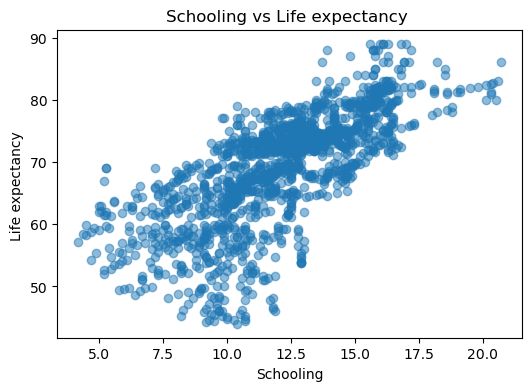

In [11]:
for variable in var_independientes:
    plt.figure(figsize=(6, 4))
    plt.scatter(data_cleaned[variable], data_cleaned[var_dependiente], alpha=0.5)
    plt.title(f'{variable} vs {var_dependiente}')
    plt.xlabel(variable)
    plt.ylabel(var_dependiente)
    plt.show()

In [13]:
def fit_model(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y    

In [15]:
def predict(X, beta):
    return X @ beta

In [17]:
X = np.column_stack((np.ones(x.shape[0]), x))

In [19]:
beta = fit_model(X, y)
print ("Model coefficients: ", beta)

Model coefficients:  [ 5.44673903e+01 -1.74467926e-02  1.01728685e-01  3.85466290e-04
 -3.89612598e-04 -1.46642920e-05 -7.64450476e-02  1.12953878e-02
  8.49144621e-02 -4.42841446e-01  7.84321035e-06 -2.66698604e-10
 -1.04752262e-01  1.02002926e+01  9.15343265e-01]


In [21]:
y_pred = predict(X, beta)
r = y - y_pred

print('Residuals:', r)

Residuals: [ 2.14297995 -3.25841546 -3.14391398 ... -4.97345118  7.38990468
  9.28169265]


In [23]:
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

MSE:  13.085328110145221
MAE:  2.7737939474393274
R^2:  0.8308019870625327


In [25]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse =  62.71526278875913
mae =  6.399037997012488
r^2=  0.2438472020728888
mse =  70.42606002951949
mae =  6.816789452681232
r^2=  0.15018617888346253
mse =  69.82867815825111
mae =  6.261484757665297
r^2=  0.01823617099221364
mse =  68.54498901158516
mae =  6.272773176228941
r^2=  0.13585543819759227
mse =  51.89498967684502
mae =  5.758063007517762
r^2=  0.254431912245368


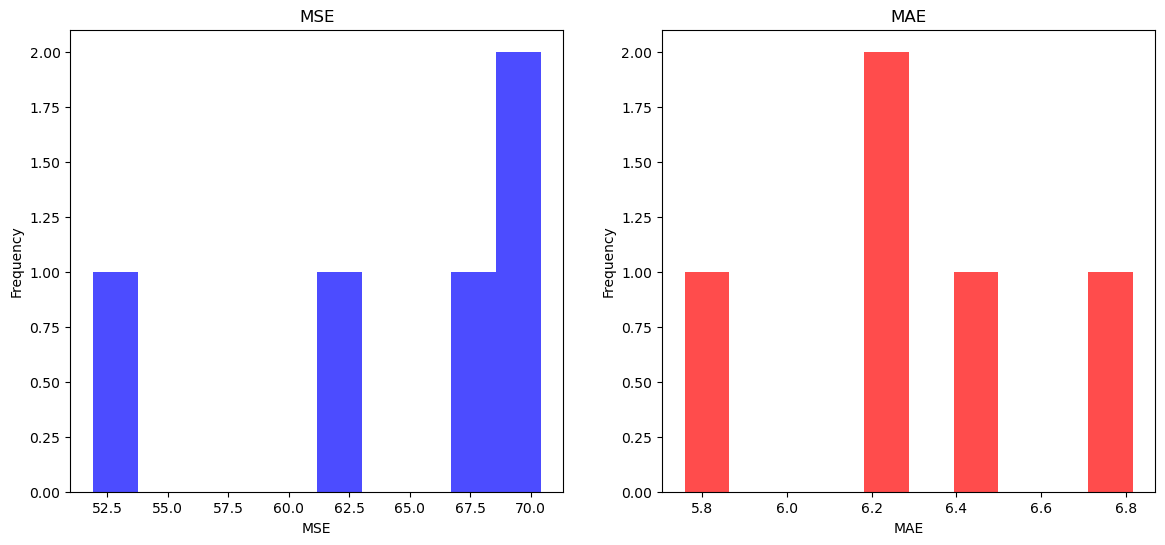

In [27]:
mse_cv = []
mae_cv = []
r2_cv = []
for train_index, test_index in kf.split(x):
    x_train = x[train_index, :]
    y_train = y[train_index]

    beta_cv = fit_model(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]    

    y_pred = predict(x_test, beta_cv)

    mse_i = mean_squared_error(y_test, y_pred)
    print('mse = ', mse_i)  
    mse_cv.append(mse_i)    

    mae_i = mean_absolute_error(y_test, y_pred)
    print('mae = ', mae_i)    
    mae_cv.append(mae_i)
    
    r2_i = r2_score(y_test, y_pred)
    print('r^2= ', r2_i)    
    r2_cv.append(r2_i)   

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(mse_cv, bins=10, color='blue', alpha=0.7)
plt.title('MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(mae_cv, bins=10, color='red', alpha=0.7)
plt.title('MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.show()

In [15]:
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

MSE: 64.12781997591098   MAE: 6.29194715023703   R^2: 0.16773528816377217


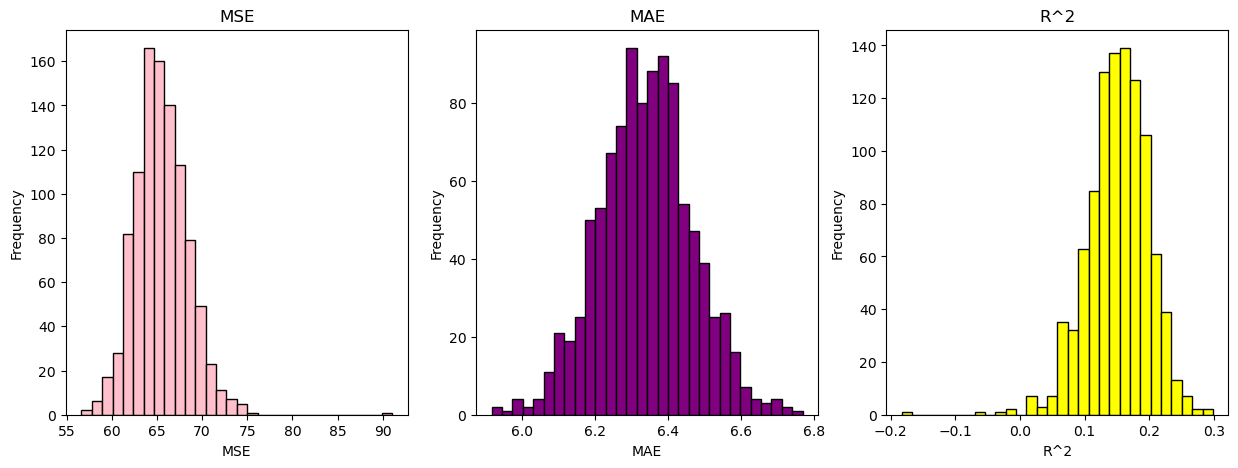

In [29]:
mse_mc = []
mae_mc = []
r2_mc = []

iterations = 1000
train_size = 0.5

for i in range(iterations):
    i = np.random.permutation(len(x))
    train_size = int(len(x) * 0.5)
    train_index = i[:train_size]
    test_index = i[train_size:]

    x_train = x[train_index, :]
    y_train = y[train_index]

    beta_mc = fit_model(x_train, y_train)

    x_test = x[test_index, :]
    y_test = y[test_index]   

    y_pred = predict(x_test, beta_mc)
    
    mse_i = mean_squared_error(y_test, y_pred)
    mse_mc.append(mse_i)    

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_mc.append(mae_i)
    
    r2_i = r2_score(y_test, y_pred)
    r2_mc.append(r2_i)   

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(mse_mc, bins=30, color='pink', edgecolor='black')
plt.title('MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_mc, bins=30, color='purple', edgecolor='black')
plt.title('MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(r2_mc, bins=30, color='yellow', edgecolor='black')
plt.title('R^2')
plt.xlabel('R^2')
plt.ylabel('Frequency')

plt.show()


In [31]:
cuadrados = {column + 'CUADRADOS': data_cleaned[column] ** 2 for column in data_cleaned.columns}
print(pd.DataFrame(cuadrados).head())

productos = {}
columnas = data_cleaned.columns

for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        productos[columnas[i] + ' X ' + columnas[j]] = data_cleaned[columnas[i]] * data_cleaned[columnas[j]]

data_extended = pd.concat([data_cleaned, pd.DataFrame(cuadrados), pd.DataFrame(productos)], axis=1)
print(data_extended.head())

   Adult MortalityCUADRADOS  infant deathsCUADRADOS  \
0                   69169.0                    3844   
1                   73441.0                    4096   
2                   71824.0                    4356   
3                   73984.0                    4761   
4                   75625.0                    5041   

   percentage expenditureCUADRADOS  Hepatitis BCUADRADOS  Measles CUADRADOS  \
0                      5080.784743                4225.0            1331716   
1                      5405.717063                3844.0             242064   
2                      5361.057504                4096.0             184900   
3                      6112.771522                4489.0            7767369   
4                        50.368952                4624.0            9078169   

   under-five deaths CUADRADOS  PolioCUADRADOS  Total expenditureCUADRADOS  \
0                         6889            36.0                     66.5856   
1                         7396        

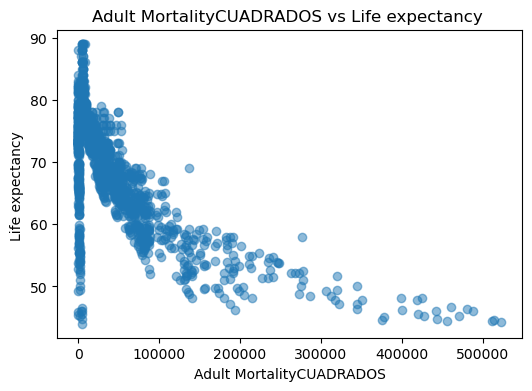

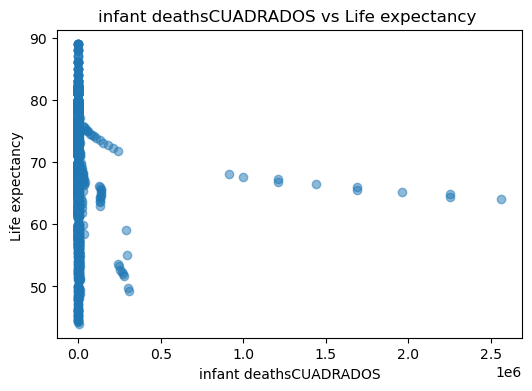

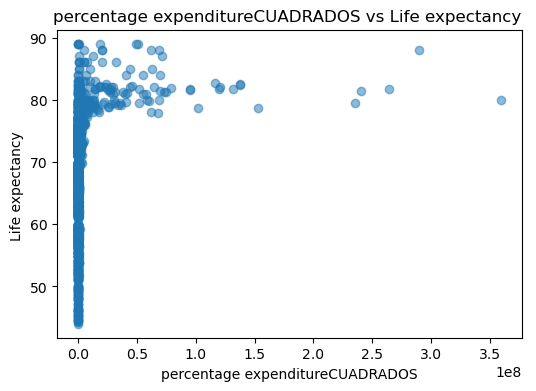

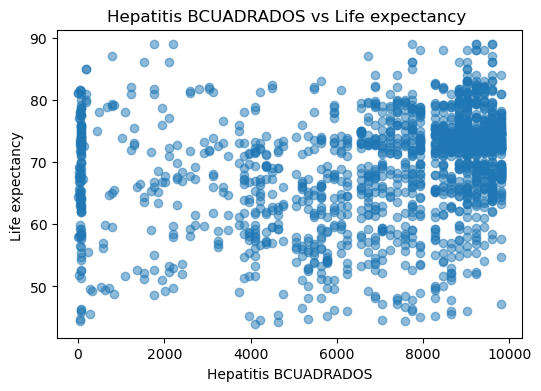

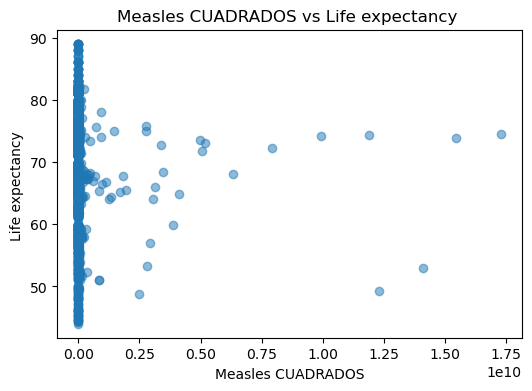

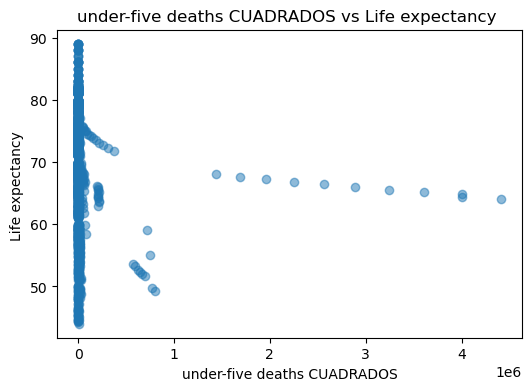

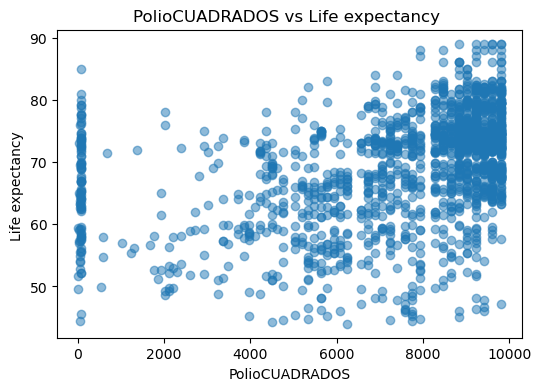

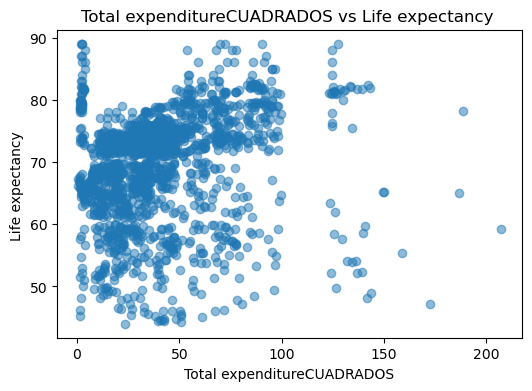

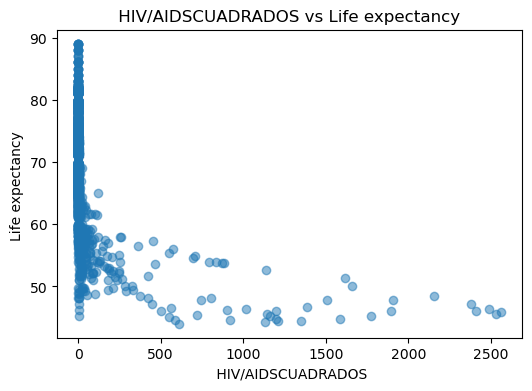

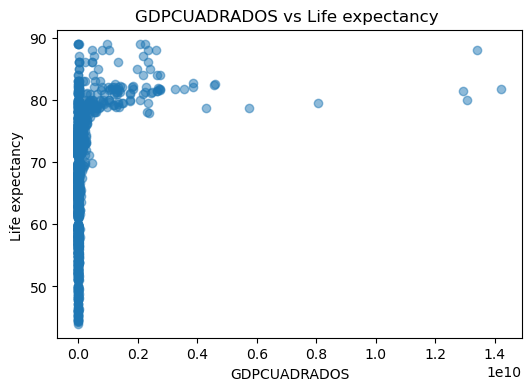

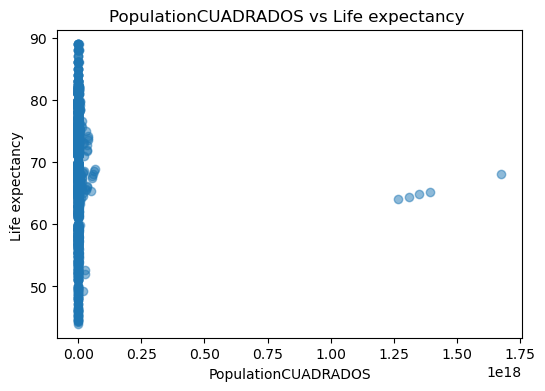

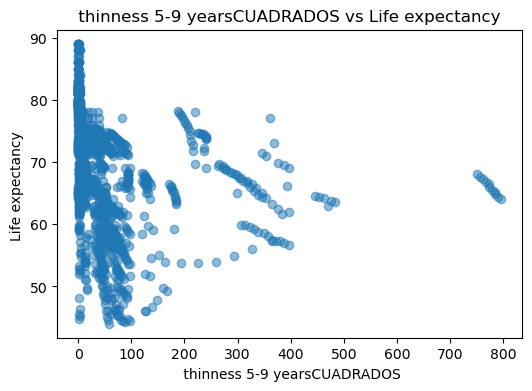

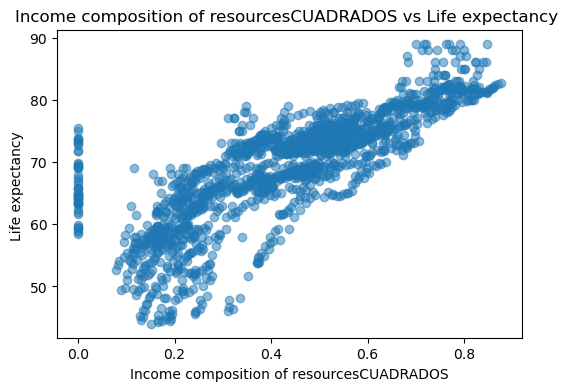

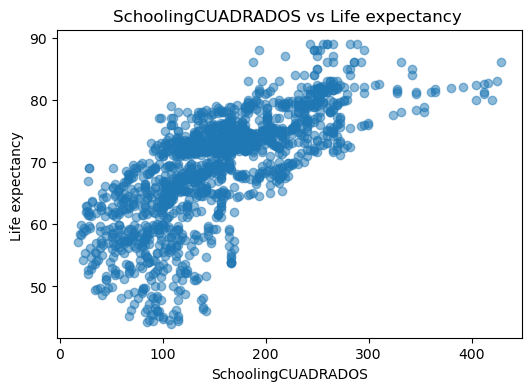

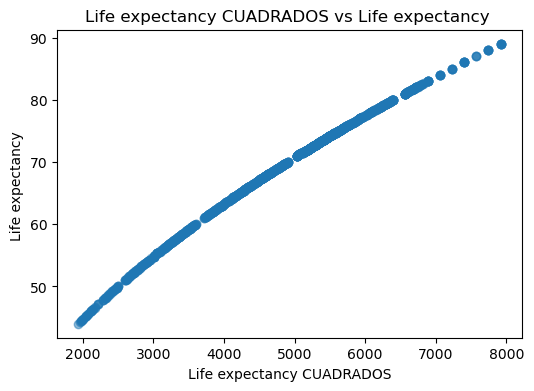

In [33]:
var_cuadrados = [col for col in data_extended.columns if 'CUADRADOS' in col]

for variable in var_cuadrados:
    plt.figure(figsize=(6, 4))
    plt.scatter(data_extended[variable], data_extended[var_dependiente], alpha=0.5)
    plt.title(f'{variable} vs {var_dependiente}')
    plt.xlabel(variable)
    plt.ylabel(var_dependiente)
    plt.show()

In [35]:
x_extended = data_extended.drop(columns=['Life expectancy ']).values  
y = data_extended['Life expectancy '].values  

x_extended = np.column_stack((np.ones(x_extended.shape[0]), x_extended))

beta = np.linalg.inv(x_extended.T @ x_extended) @ x_extended.T @ y

print("Model coefficients: ", beta)

y_pred = x_extended @ beta

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE: ", mse)
print("MAE: ", mae)
print("R^2: ", r2)

Model coefficients:  [ 3.04249624e+01 -1.55173134e-02  1.72664927e-01  5.04061025e-04
 -1.60697111e-02 -7.29581322e-05 -1.29036031e-01 -6.86873500e-03
  9.36664564e-02 -4.80745504e-01  4.69678138e-05  5.54756812e-09
 -3.08046548e-01  1.52666739e+01  3.80176683e-01  8.90215418e-07
  1.72214678e-04 -7.91410712e-10 -4.43906505e-06  2.85153798e-11
  9.76829853e-05  6.56388729e-06 -4.17637223e-03  1.46978133e-03
  1.05723667e-10 -4.45314074e-19  1.84019315e-04  1.07835512e+00
 -1.03775814e-03  7.79151874e-03 -6.79235684e-05  3.21455002e-07
  7.10035269e-06  2.59809751e-09  5.29535204e-05 -2.29934491e-06
 -2.59148494e-05  1.22932901e-04 -8.19183934e-08 -1.39582946e-12
  7.26480076e-05 -6.14420884e-03 -2.80267902e-05  2.75273626e-04
 -2.19543565e-05  1.03528198e-05 -2.18093496e-07 -2.58891711e-04
 -1.40452307e-04 -7.57384591e-04 -1.31091792e-03  3.16862643e-06
 -2.02054206e-11 -1.70841179e-04 -6.01645181e-02  5.04466238e-03
 -2.34278869e-03 -4.55476281e-07  5.25343197e-09  1.78049376e-05
  2.

In [37]:
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

MSE:  0.02613667553247974
MAE:  0.09675893322855132
R^2:  0.9996620433566769


In [39]:
print(data_extended.columns)

Index(['Adult Mortality', 'infant deaths', 'percentage expenditure',
       'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio',
       'Total expenditure', ' HIV/AIDS', 'GDP',
       ...
       'Population X  thinness 5-9 years',
       'Population X Income composition of resources',
       'Population X Schooling', 'Population X Life expectancy ',
       ' thinness 5-9 years X Income composition of resources',
       ' thinness 5-9 years X Schooling',
       ' thinness 5-9 years X Life expectancy ',
       'Income composition of resources X Schooling',
       'Income composition of resources X Life expectancy ',
       'Schooling X Life expectancy '],
      dtype='object', length=135)


In [41]:
x_extended = data_extended.drop(columns=['Life expectancy ']) 
y = data_extended['Life expectancy '].values

In [43]:
x_extended = x_extended.values

In [45]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)

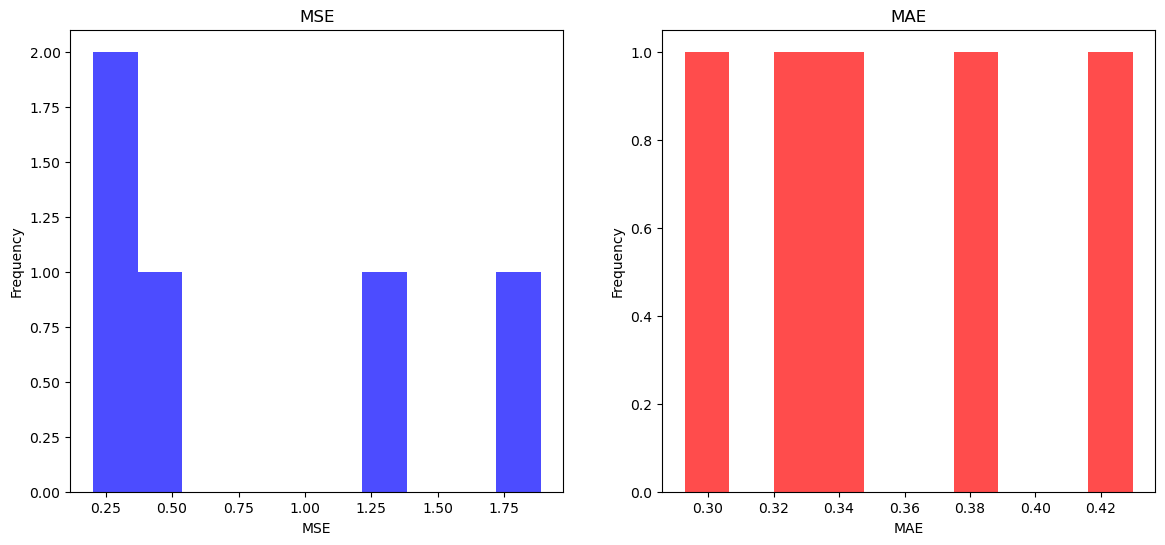

In [47]:
mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf.split(x_extended):
    x_train, y_train = x_extended[train_index, :], y[train_index]

    beta_cv = fit_model(x_train, y_train)

    x_test, y_test = x_extended[test_index, :], y[test_index]
    y_pred = predict(x_test, beta_cv)

    mse_i = mean_squared_error(y_test, y_pred)
    mae_i = mean_absolute_error(y_test, y_pred)
    r2_i = r2_score(y_test, y_pred)

    mse_cv.append(mse_i)
    mae_cv.append(mae_i)
    r2_cv.append(r2_i)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(mse_cv, bins=10, color='blue', alpha=0.7)
plt.title('MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(mae_cv, bins=10, color='red', alpha=0.7)
plt.title('MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.show()

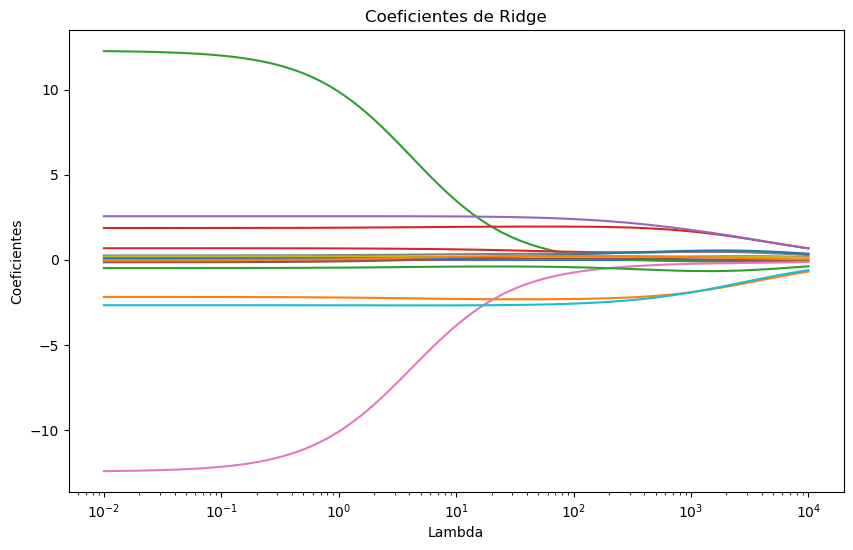

MSE: 4844.549820042791
R^2: -61.641776822721795


In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lambdas = np.logspace(-2, 4, 100) 

coefs = []

for lambd in lambdas:
    ridge = Ridge(alpha=lambd, fit_intercept=False)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10,6))
plt.plot(lambdas, coefs)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coeficientes')
plt.title('Coeficientes de Ridge')
plt.show()

y_pred = ridge.predict(X_scaled)
print('MSE:', mean_squared_error(y, y_pred))
print('R^2:', r2_score(y, y_pred))

In [51]:
lasso = Lasso(alpha=0.1) 
lasso.fit(X_scaled, y)

lasso_coef = lasso.coef_

columns = data_cleaned.drop(columns=['Life expectancy ']).columns 

for coef, col in zip(lasso_coef, columns):
    if coef != 0:
        print(f"Variable: {col}, Coeficiente: {coef}")

Variable: infant deaths, Coeficiente: -2.335771112418577
Variable: Hepatitis B, Coeficiente: 0.5752392840701521
Variable: Polio, Coeficiente: -0.23994671420767893
Variable: Total expenditure, Coeficiente: 0.30481402845668343
Variable:  HIV/AIDS, Coeficiente: 0.09294009887574015
Variable: GDP, Coeficiente: -2.6274899510797987
Variable: Population, Coeficiente: 0.07672752805465814
Variable: Income composition of resources, Coeficiente: -0.3323614264737169
Variable: Schooling, Coeficiente: 1.9449242881704207


In [53]:
print(len(columns))
print(len(lasso_coef))

14
15


In [55]:
if len(lasso_coef) != len(columns):
    lasso_coef = lasso_coef[1:]

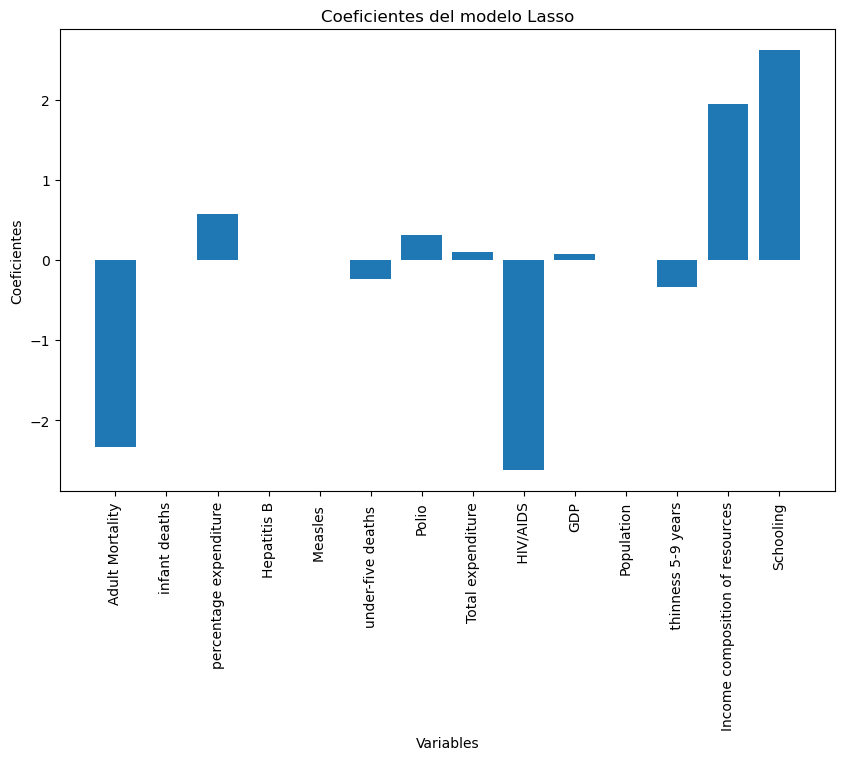

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(columns, lasso_coef)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes del modelo Lasso')
plt.show()

In [57]:
#------------------------------------------------------------------------------------------------------------------
#                      9.   P R E G U N T A S 
#------------------------------------------------------------------------------------------------------------------


# a. ¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?
# No, ya que el r^2 tiene un valor bajo y los valores algo altos de MSE Y MAE. Podría ser porque la relación entre las variables independientes
# y la dependiente no es lineal o existen datos irrelevantes. 

# b. ¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.
# Sí, hay una variabilidad importante en estos valores al aplicar cv. Los valores de r^2 van desde un min de -0.0431 hasta 0.2593, lo que indica que 
# el modelo no siempre explica la variación de los datos. 
# Los valores de MSE van entre 61.22 y 69.90, por lo que el el error cuadrático medio también cambia entre dif subconjuntos. Los valores de 
# MAE también indican variabilidad, desde 6.0379 hasta 6.6880, esto demuestra que el error prom abs del modelo también cambia entre subconjuntos. 

# c. Qué modelo es mejor para los datos del problema, el lineal o el cuadrático? ¿Por qué?
# El cuadrátrico, el r^2 es más alto, ahora es de 0.99, también MSE Y MAE son valores más bajos en comparación al lineal. 

# d. ¿Qué variables son más relevantes para el modelo según Ridge y Lasso?
# Los dos modelos muestran que Adult mortality y HIV/AIDS son variables importantes, ya que tienen coeficientes significativos.

# e. ¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?
# 

In [59]:
#------------------------------------------------------------------------------------------------------------------
#   Ejercicio 2
#---------------------------------------------------------

In [61]:
#Las características de este conjunto de datos son las siguientes:

# X1 - age
# X2 - test_time
# X3 - Jitter (%)
# X4 - Jitter (Abs)
# X5 - Jitter: RAP
# X6 - Jitter: PPQ5
# X7 - Jitter: DDP
# X8 - Shimmer
# X9- Shimmer (dB)
# X10 - Shimmer: APQ3
# X11 - Shimmer: APQ5
# X12 - Shimmer: APQ11
# X13 - Shimmer: DDA
# X14 - NHR
# X15 - HNR
# X16 - RPDE
# X17 - DFA
# X18 - PPE
# X19 - sex

# Variables dependientes:  motor_UPDRS
# Variables predictoras: Todas las variables predictoras, menos X2, X6, X10, X14

# X1 - age
# X3 - Jitter (%)
# X4 - Jitter (Abs)
# X5 - Jitter: RAP
# X7 - Jitter: DDP
# X8 - Shimmer
# X9- Shimmer (dB)
# X11 - Shimmer: APQ5
# X12 - Shimmer: APQ11
# X13 - Shimmer: DDA
# X15 - HNR
# X16 - RPDE
# X17 - DFA
# X18 - PPE
# X19 - sex

In [69]:
column_names = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 
                'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 
                'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']  

file_path = '/Users/snvpau/Documents/parkinsons_updrs.data'
df = pd.read_csv(file_path, names=column_names)
print(df.head()) 

   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0  subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)   
1         1   72    0     5.6431       28.199       34.398    0.00662   
2         1   72    0     12.666       28.447       34.894      0.003   
3         1   72    0     19.681       28.695       35.389    0.00481   
4         1   72    0     25.647       28.905        35.81    0.00528   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3   
1    3.38e-005     0.00401      0.00317  ...         0.23       0.01438   
2    1.68e-005     0.00132       0.0015  ...        0.179       0.00994   
3   2.462e-005     0.00205      0.00208  ...        0.181       0.00734   
4   2.657e-005     0.00191      0.00264  ...        0.327       0.01106   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0  Shimmer:APQ5  Shimmer:APQ11  Shim

In [71]:
predictoras = ['age', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 
        'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'HNR', 'RPDE', 'DFA', 'PPE', 'sex']
dependiente = 'motor_UPDRS'

data = df[predictoras + [dependiente]]

data_cleaned = data.dropna()

x = data_cleaned[predictoras].values
y = data_cleaned[dependiente].values

print(data_cleaned.head())
print(f"Variables predictoras (X): {x.shape}")
print(f"Variable dependiente (y): {y.shape}")
print(df.head())

   age  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:DDP  Shimmer  Shimmer(dB)  \
0  age  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:DDP  Shimmer  Shimmer(dB)   
1   72    0.00662    3.38e-005     0.00401     0.01204  0.02565         0.23   
2   72      0.003    1.68e-005     0.00132     0.00395  0.02024        0.179   
3   72    0.00481   2.462e-005     0.00205     0.00616  0.01675        0.181   
4   72    0.00528   2.657e-005     0.00191     0.00573  0.02309        0.327   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA     HNR     RPDE      DFA  \
0  Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA     HNR     RPDE      DFA   
1       0.01309        0.01662      0.04314   21.64  0.41888  0.54842   
2       0.01072        0.01689      0.02982  27.183  0.43493  0.56477   
3       0.00844        0.01458      0.02202  23.047  0.46222  0.54405   
4       0.01265        0.01963      0.03317  24.445   0.4873  0.57794   

       PPE  sex  motor_UPDRS  
0      PPE  sex  motor_UPDRS  
1  0.16006    0   

In [73]:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)

In [75]:
for column in predictoras + [dependiente]:
    df[column] = pd.to_numeric(df[column], errors='coerce')

print(df.dtypes)

data_cleaned = df.dropna(subset = predictoras + [dependiente])

x = data_cleaned[predictoras].values
y = data_cleaned[dependiente].values

print(data_cleaned.head())
print(f"Variables predictoras (X): {x.shape}")
print(f"Variable dependiente (y): {y.shape}")

mse_list = []
mae_list = []
r2_list = []

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse_list.append(mean_squared_error(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

print('MSE promedio:', np.mean(mse_list))
print('MAE promedio:', np.mean(mae_list))
print('R^2 promedio:', np.mean(r2_list))

subject#          object
age              float64
sex              float64
test_time         object
motor_UPDRS      float64
total_UPDRS       object
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5       object
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3      object
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR               object
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object
  subject#   age  sex test_time  motor_UPDRS total_UPDRS  Jitter(%)  \
1        1  72.0  0.0    5.6431       28.199      34.398    0.00662   
2        1  72.0  0.0    12.666       28.447      34.894    0.00300   
3        1  72.0  0.0    19.681       28.695      35.389    0.00481   
4        1  72.0  0.0    25.647       28.905       35.81    0.00528   
5        1  72.0  0.0    33.642       29.187      36.375    0.00335   

   Jitter

In [77]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [79]:
mse_nfeat = []

n_feats = range(1, len(predictoras) + 1)

for n_feat in n_feats:
    print(f'---- n features = {n_feat} ----')
    
    mse_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x_scaled):
        
        x_train, x_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        fselection_cv = SelectKBest(f_regression, k=n_feat)
        x_train_kbest = fselection_cv.fit_transform(x_train, y_train)
        x_test_kbest = fselection_cv.transform(x_test)

        model_cv = LinearRegression()
        model_cv.fit(x_train_kbest, y_train)

        y_pred = model_cv.predict(x_test_kbest)
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)
    
    mse_avg = np.mean(mse_cv)
    mse_nfeat.append(mse_avg)
    print(f'MSE promedio para {n_feat} características: {mse_avg}')

---- n features = 1 ----
MSE promedio para 1 características: 61.15404761534212
---- n features = 2 ----
MSE promedio para 2 características: 60.21165390277007
---- n features = 3 ----
MSE promedio para 3 características: 59.95307855359145
---- n features = 4 ----
MSE promedio para 4 características: 59.98596831415936
---- n features = 5 ----
MSE promedio para 5 características: 59.95177346709304
---- n features = 6 ----
MSE promedio para 6 características: 58.98009062072386
---- n features = 7 ----
MSE promedio para 7 características: 57.475337432630894
---- n features = 8 ----
MSE promedio para 8 características: 57.45274080830036
---- n features = 9 ----
MSE promedio para 9 características: 57.183163646282864
---- n features = 10 ----
MSE promedio para 10 características: 57.282914492190244
---- n features = 11 ----
MSE promedio para 11 características: 57.24809416582938
---- n features = 12 ----
MSE promedio para 12 características: 57.248505750997694
---- n features = 13 ----
MSE 

Número óptimo de características: 15


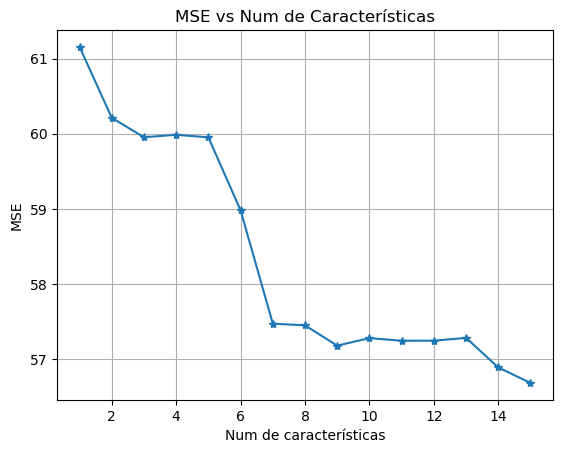

Características seleccionadas:  ['age' 'Jitter(%)' 'Jitter(Abs)' 'Jitter:RAP' 'Jitter:DDP' 'Shimmer'
 'Shimmer(dB)' 'Shimmer:APQ5' 'Shimmer:APQ11' 'Shimmer:DDA' 'HNR' 'RPDE'
 'DFA' 'PPE' 'sex']
Coeficientes del modelo final: [ 1.73347153e+00  2.45153211e-01 -2.26168988e+00 -1.15444749e+02
  1.16478662e+02  2.62810850e+00 -1.34889780e+00 -3.21650200e+00
  1.90794995e+00 -8.81354751e-01 -1.67084658e+00  7.75876209e-02
 -1.53505641e+00  1.72627249e+00 -5.65044687e-01]


In [81]:
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print(f"Número óptimo de características: {opt_features}")

plt.plot(n_feats, mse_nfeat, marker ='*')
plt.xlabel("Num de características")
plt.ylabel("MSE")
plt.title("MSE vs Num de Características")
plt.grid(True)
plt.show()

fselection_opt = SelectKBest(f_regression, k=opt_features)
x_transformed = fselection_opt.fit_transform(x_scaled, y)

print("Características seleccionadas: ", np.array(predictoras)[fselection_opt.get_support()])

model_ = LinearRegression()
model_.fit(x_transformed, y)
print("Coeficientes del modelo final:", model_.coef_)

In [87]:
for column in data_cleaned.columns:
    data_cleaned[column] = pd.to_numeric(data_cleaned[column], errors='coerce')

print(data_cleaned.dtypes)

data_cleaned = data_cleaned.dropna()

print(data_cleaned.isna().sum())

X = data_cleaned[predictoras].values
y = data_cleaned[dependiente].values

print("----- Selección de características usando el 50% de los predictores -----")
modelo = LinearRegression()
selector_secuencial = SequentialFeatureSelector(modelo, n_features_to_select=int(len(predictoras) * 0.5), direction='forward')
selector_secuencial.fit(X, y)
selected_features = np.array(predictoras)[selector_secuencial.get_support()]
print("Características seleccionadas:", selected_features)

age              float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
sex              float64
motor_UPDRS      float64
dtype: object
age              0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
HNR              0
RPDE             0
DFA              0
PPE              0
sex              0
motor_UPDRS      0
dtype: int64
----- Selección de características usando el 50% de los predictores -----
Características seleccionadas: ['age' 'Jitter(%)' 'Jitter(Abs)' 'Jitter:RAP' 'Jitter:DDP' 'Shimmer:APQ11'
 'PPE']


In [89]:
n_feats = list(range(1, len(predictoras)))

mse_nfeat = []

for n_feat in n_feats:
    print('---- Número de características =', n_feat)
    
    mse_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        y_train = y[train_index]     

        modelo_cv = LinearRegression()

        selector_secuencial_cv = SequentialFeatureSelector(modelo_cv, n_features_to_select=n_feat, direction ='forward')
        selector_secuencial_cv.fit(X_train, y_train)
        X_train_transformed = selector_secuencial_cv.transform(X_train)

        modelo_cv.fit(X_train_transformed, y_train)

        X_test_transformed = selector_secuencial_cv.transform(X[test_index])
        y_test = y[test_index]
        y_pred = modelo_cv.predict(X_test_transformed)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)    

    mse_promedio = np.mean(mse_cv)
    mse_nfeat.append(mse_promedio)
    
    print('MSE Promedio:', mse_promedio)

---- Número de características = 1
MSE Promedio: 61.14297343339306
---- Número de características = 2
MSE Promedio: 60.039784362329485
---- Número de características = 3
MSE Promedio: 59.880406201675896
---- Número de características = 4
MSE Promedio: 59.27171168539455
---- Número de características = 5
MSE Promedio: 59.245264752324616
---- Número de características = 6
MSE Promedio: 59.42831893399366
---- Número de características = 7
MSE Promedio: 59.10301995015766
---- Número de características = 8
MSE Promedio: 58.76815659033126
---- Número de características = 9
MSE Promedio: 59.01328307540823
---- Número de características = 10
MSE Promedio: 58.93912362549448
---- Número de características = 11
MSE Promedio: 58.94576966821128
---- Número de características = 12
MSE Promedio: 58.431073831778875
---- Número de características = 13
MSE Promedio: 58.02391221305337
---- Número de características = 14
MSE Promedio: 56.73276505598725


In [91]:
n_feats = list(range(1, len(predictoras))) 

mse_nfeat = []

for n_feat in n_feats:
    print('---- Número de características =', n_feat)
    
    mse_cv = []

    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        y_train = y[train_index]     

        modelo_cv = LinearRegression()

        selector_rfe_cv = RFE(modelo_cv, n_features_to_select=n_feat)
        selector_rfe_cv.fit(X_train, y_train)
        X_train_transformed = selector_rfe_cv.transform(X_train)

        modelo_cv.fit(X_train_transformed, y_train)
        
        X_test_transformed = selector_rfe_cv.transform(X[test_index])
        y_test = y[test_index]
        y_pred = modelo_cv.predict(X_test_transformed)
    
        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)    

    mse_promedio = np.mean(mse_cv)
    mse_nfeat.append(mse_promedio)
    
    print('MSE Promedio:', mse_promedio)

---- Número de características = 1
MSE Promedio: 65.74719229887924
---- Número de características = 2
MSE Promedio: 65.75293860683848
---- Número de características = 3
MSE Promedio: 65.7758396639804
---- Número de características = 4
MSE Promedio: 65.15623864032064
---- Número de características = 5
MSE Promedio: 64.35289272030916
---- Número de características = 6
MSE Promedio: 63.83668519799615
---- Número de características = 7
MSE Promedio: 63.264524858731065
---- Número de características = 8
MSE Promedio: 61.421750757096525
---- Número de características = 9
MSE Promedio: 60.24940754441788
---- Número de características = 10
MSE Promedio: 60.20500441210478
---- Número de características = 11
MSE Promedio: 60.43865300824827
---- Número de características = 12
MSE Promedio: 60.24133087146917
---- Número de características = 13
MSE Promedio: 59.747173066022164
---- Número de características = 14
MSE Promedio: 60.01626786533259


optimal number of features  13


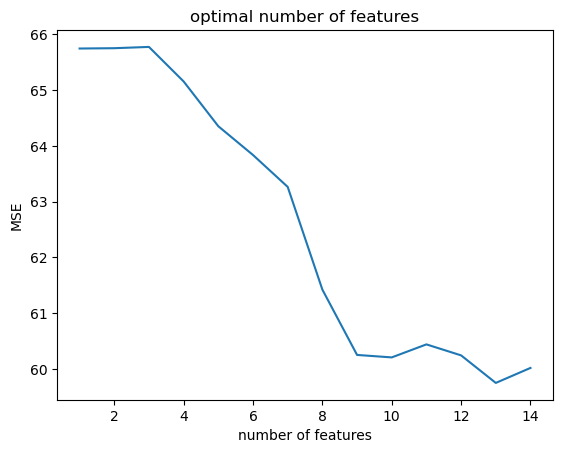

optimal number of features: ['Jitter(%)' 'Jitter(Abs)' 'Jitter:RAP' 'Jitter:DDP' 'Shimmer'
 'Shimmer(dB)' 'Shimmer:APQ5' 'Shimmer:APQ11' 'Shimmer:DDA' 'RPDE' 'DFA'
 'PPE' 'sex']


In [93]:
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("optimal number of features ", opt_features)

plt.plot(n_feats, mse_nfeat)
plt.xlabel("number of features")
plt.ylabel("MSE")
plt.title("optimal number of features")
plt.show()

modelo = LinearRegression()
selector_rfe_opt = RFE(modelo, n_features_to_select=opt_features)
selector_rfe_opt.fit(X, y)

selected_features_opt = np.array(predictoras)[selector_rfe_opt.get_support()]
print("optimal number of features:", selected_features_opt)

In [122]:
x = data_cleaned[predictoras].values
y = data_cleaned[dependiente].values

kf = KFold(n_splits=5, shuffle=True)  

parameters = {'n_neighbors': np.arange(1, 100)}
knn_cv = GridSearchCV(KNeighborsRegressor(), parameters, cv=5)

y_pred = cross_val_predict(knn_cv, X, y, cv=kf)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 15.367967539662143
MAE: 2.7469988684031805
R^2: 0.7674126793891374


In [ ]:
#------------------------------------------------------------------------------------------------------------------
#                      7.   P R E G U N T A S 
#------------------------------------------------------------------------------------------------------------------


# a. Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?
# No, no es el más adecuado. Tenemos un r^2 (0.14) bajo y un alto MSE 

# b. ¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?
# WRAPPER puede ser un bueb método, puesto que ayuda a encontrar el num óptimo de características que minimizan el error.
# y es un método que nos sirve para maximizar el rendimiento de nuestro modelo.

# d. KNN funcionó mejor que los lineales. Esto porque los modelos no lineales son más indicados para capturar patrones
# más complejos y no lineales, lo que resulta en un mejor rendimiento, un MSE bajo y un r^2 alto, y para mis datos que 
# parecen tener relaciones no lineales, resulta más efectivo. 

# e. ¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.
# Después de modelar los datos pude darme cuenta de la importancia que tiene el probar distintos modelos de regresión y 
# selección de características. Para los datos con relaciones no lineales, los modelos como KNN son más efectivos.
# Sin embargo, la regresión lineal sigue siendo útil para comenzar y entender las relaciones en los datos. La selección del
# modelo adecuado es muy importante para el rendimiento.